To begin, let's look the "simpler" RH jump conditions and verify them in our simulation.

$$
[[B_n]] = 0
$$

In [2]:
## import necessary modules

import sys, os
sys.path.append('../vysxd')
from vysxd_analysis import *
from vysxd_define import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

In [3]:
## pull data

b1_path = 'data/MS/FLD/part_b1/'
b2_path = 'data/MS/FLD/part_b2/'
b3_path = 'data/MS/FLD/part_b3/'

b1 = get_osiris_quantity_1d(b1_path)
b1_0 = vysxd_get_data(f'{b1_path}part_b1-000000.h5') ##can use this for easy labeling

b2 = get_osiris_quantity_1d(b2_path)
b2_0 = vysxd_get_data(f'{b2_path}part_b2-000000.h5')

b3 = get_osiris_quantity_1d(b3_path)
b3_0 = vysxd_get_data(f'{b3_path}part_b3-000000.h5')


e1_path = 'data/MS/FLD/part_e1/'
e2_path = 'data/MS/FLD/part_e2/'
e3_path = 'data/MS/FLD/part_e3/'

e1 = get_osiris_quantity_1d(e1_path)
e1_0 = vysxd_get_data(f'{e1_path}part_e1-000000.h5') ##can use this for easy labeling

e2 = get_osiris_quantity_1d(e2_path)
e2_0 = vysxd_get_data(f'{e2_path}part_e2-000000.h5')

e3 = get_osiris_quantity_1d(e3_path)
e3_0 = vysxd_get_data(f'{e3_path}part_e3-000000.h5')

In [16]:
## Since get_osiris_quantity_1d outputs a matrix type object, without
## dictionary capabilities of vysxd_get_data, it is useful to include the
## first timestep so you don't need to manually label everything 

def plot_quantity(q, q0 = ''):
    plt.figure()
    plt.imshow(q[0], origin='lower', extent=[q[3][0], q[3][-1], q[4][0], q[4][-1]], aspect='auto')
    if (q0 != ''):
        plt.ylabel(f'{q0.AXIS1_NAME} [${q0.AXIS1_UNITS}$]')
        plt.xlabel(f'Time [${q0.TIME_UNITS}$]')
        plt.colorbar(label=q0.DATA_NAME)

In [17]:
## Without transforming our coordinate system, we can transform the E and B
## fields according to the lorentz transformations

def field_transform(v: float, e_: np.array, b_: np.array):
    gamma = 1/np.sqrt(1-v**2)

    e1 = e_[0]
    b1 = b_[0]

    e2 = gamma*(e_[1] + v*b_[2])
    b2 = gamma*(b_[1] - v*e_[2])

    e3 = gamma*(e_[2] - v*b_[1])
    b3 = gamma*(b_[2] + v*e_[1])
    return [e1,e2,e3], [b1,b2,b3]

In [6]:
## showing that the first jump condition can be verified is trivial,
## since the B field is uniform

# plot_quantity(b1,b1_0)

eprime, bprime = field_transform(.1, [e1[0], e2[0], e3[0]], [b1[0], b2[0], b3[0]])

The next jump condition is to show that the tangential E field is continuous

$$
[[\mathbf{E_t}]] = [[v_n \mathbf{B_t} - B_n \mathbf{v_t}]] = 0
$$

In [18]:
electron_ufl1 = get_osiris_quantity_1d('data/MS/UDIST/electrons/ufl1/')
electron_ufl1_0 = vysxd_get_data('data/MS/UDIST/electrons/ufl1/ufl1-electrons-000000.h5')
positron_ufl1 = get_osiris_quantity_1d('data/MS/UDIST/positrons/ufl1/')
positron_ufl1_0 = vysxd_get_data('data/MS/UDIST/positrons/ufl1/ufl1-positrons-000000.h5')
## FINISH THIS LATER

The next condition to verify is 
$$
[[\rho v_n]] = 0
$$

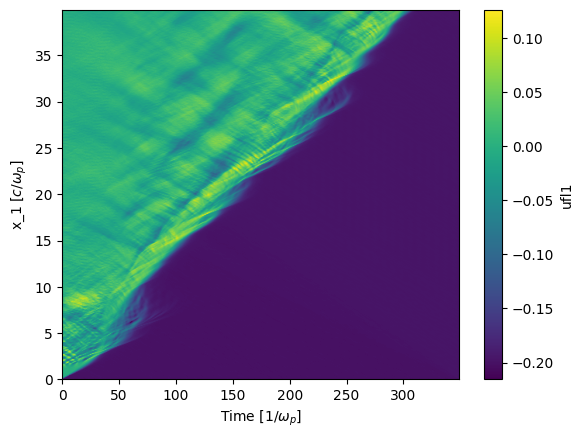

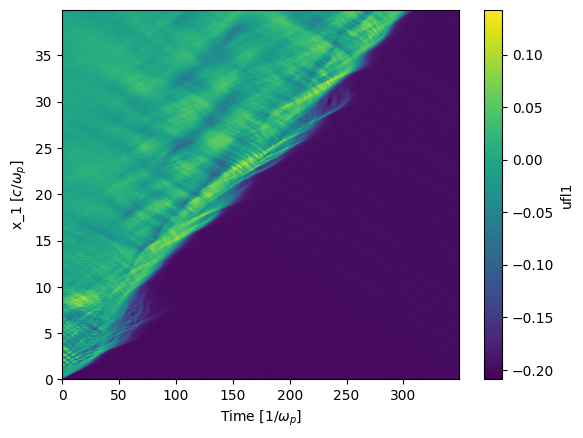

In [19]:
plot_quantity(electron_ufl1,electron_ufl1_0)
plot_quantity(positron_ufl1,positron_ufl1_0)

In [20]:
electron_density = get_osiris_quantity_1d('data/MS/DENSITY/electrons/charge/')
electron_density_0 = vysxd_get_data('data/MS/DENSITY/electrons/charge/charge-electrons-000000.h5')
electron_density_ = get_osiris_quantity_1d('data/MS/DENSITY/electrons/q1/')
electron_density_0_ = vysxd_get_data('data/MS/DENSITY/electrons/q1/q1-electrons-000000.h5')

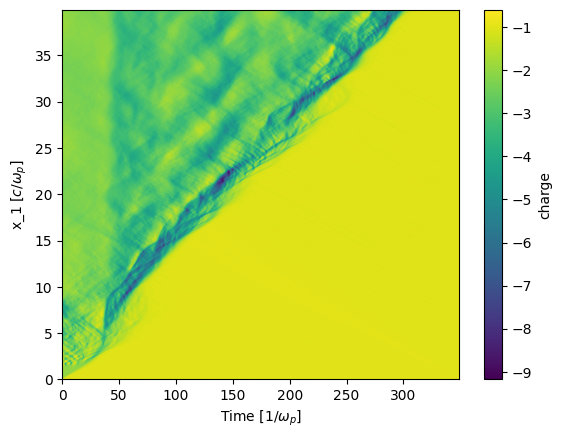

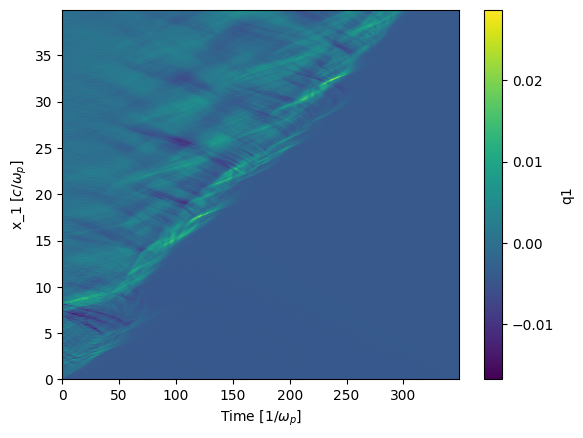

In [21]:
plot_quantity(electron_density,electron_density_0)
plot_quantity(electron_density_,electron_density_0_)

In [5]:
positron_density = get_osiris_quantity_1d('data/MS/DENSITY/positrons/charge/')
positron_density_0 = vysxd_get_data('data/MS/DENSITY/positrons/charge/charge-positrons-000000.h5')
positron_density_ = get_osiris_quantity_1d('data/MS/DENSITY/positrons/q1/')
positron_density_0_ = vysxd_get_data('data/MS/DENSITY/positrons/q1/q1-positrons-000000.h5')

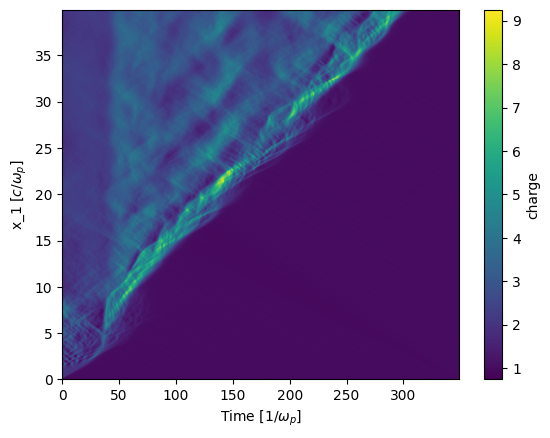

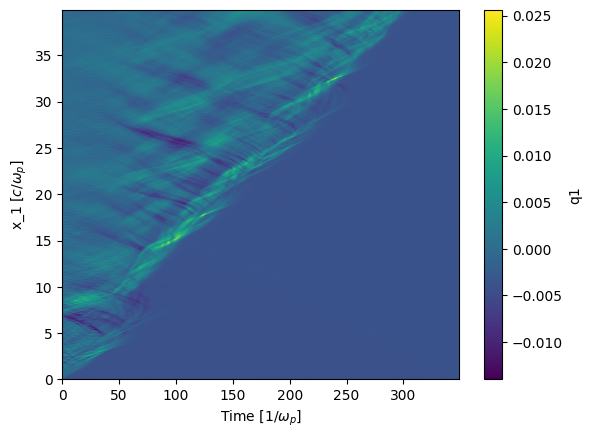

In [23]:
plot_quantity(positron_density,positron_density_0)
plot_quantity(positron_density_,positron_density_0_)

In [48]:
# verify mass continuity

mass_continuity = np.multiply(positron_ufl1[0] - .1, positron_density[0]) - np.multiply(electron_ufl1[0] - .1,electron_density[0])

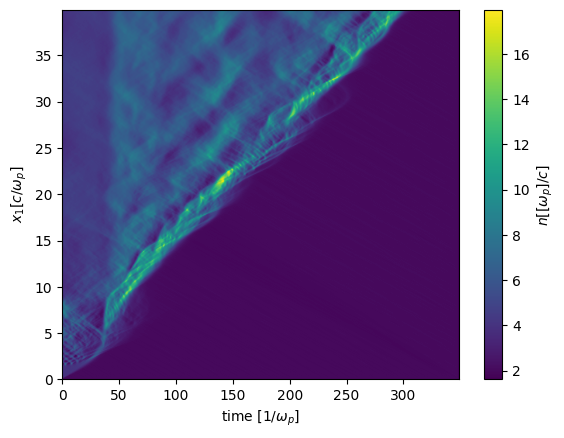

In [54]:
plt.imshow(positron_density[0] - electron_density[0], origin = 'lower', 
           extent = (positron_density[3][0],positron_density[3][-1],
                      positron_density[4][0],positron_density[4][-1]), aspect = 'auto')
plt.xlabel('time [$1/\omega_p$]')
plt.ylabel('$x_1 [c/\omega_p]$')
plt.colorbar(label = '$n [[\omega_p]/c]$')

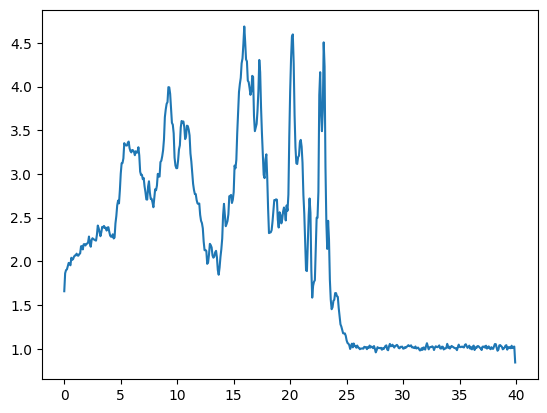

In [10]:
plt.plot(positron_density[4], positron_density[0][300])

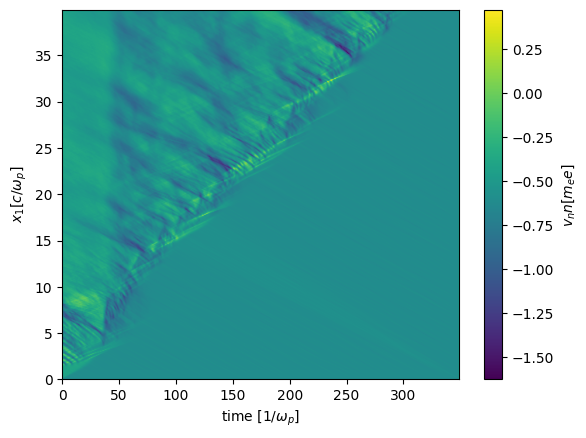

In [49]:
plt.imshow(mass_continuity, origin = 'lower', 
           extent = (positron_density[3][0],positron_density[3][-1],
                      positron_density[4][0],positron_density[4][-1]), aspect = 'auto')
plt.xlabel('time [$1/\omega_p$]')
plt.ylabel('$x_1 [c/\omega_p]$')
plt.colorbar(label = '$v_n n [m_e e]$')

In [50]:
p1x1_p = get_osiris_quantity_2d('data/MS/PHA/p1x1/positrons/')
p1x1_e = get_osiris_quantity_2d('data/MS/PHA/p1x1/electrons/')

In [53]:
np.shape(p1x1_e[0])
np.shape(p1x1_p[0])

(460, 512, 512)